In [ ]:
!nvidia-smi

Mon May 22 13:13:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os 
from glob import glob
import os 
import cv2
import matplotlib.pyplot as plt

In [4]:
os.chdir('/content/drive/MyDrive/Deep Learning/Q3')

In [ ]:
train_path = os.path.join(os.curdir,'train')
test_path = os.path.join(os.curdir,'test')

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation='relu',padding = 'same',input_shape = (150,150,3))) #150,150,32
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation='relu')) #148,148,64
model.add(MaxPooling2D(pool_size=(2,2))) #74,74,64
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation='relu')) #72,72,128
model.add(MaxPooling2D(pool_size=(2,2))) #36,36,128
model.add(Conv2D(filters = 128,kernel_size = (5,5),activation='relu')) #32,32,128
model.add(Flatten())
model.add(Dense(3,activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)      

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./225)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dir = train_datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size = 10,
                                              class_mode= 'categorical')

test_dir = test_datagen.flow_from_directory(test_path,
                                              target_size=(150,150),
                                              batch_size = 10,
                                              class_mode= 'categorical')

Found 179 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [ ]:
r = model.fit(
    train_dir,
    validation_data = test_dir,
    epochs=10,
    steps_per_epoch=len(train_dir),
    validation_steps=len(test_dir)
)

Epoch 1/10
18/18 [==============================] - 76s 4s/step - loss: 1.6518 - accuracy: 0.4190 - val_loss: 0.9479 - val_accuracy: 0.4000
Epoch 2/10
18/18 [==============================] - 1s 55ms/step - loss: 0.6391 - accuracy: 0.7598 - val_loss: 0.3288 - val_accuracy: 0.9333
Epoch 3/10
18/18 [==============================] - 1s 55ms/step - loss: 0.3326 - accuracy: 0.8994 - val_loss: 0.2728 - val_accuracy: 0.9111
Epoch 4/10
18/18 [==============================] - 1s 76ms/step - loss: 0.3424 - accuracy: 0.8771 - val_loss: 0.1692 - val_accuracy: 0.9556
Epoch 5/10
18/18 [==============================] - 2s 84ms/step - loss: 0.1723 - accuracy: 0.9497 - val_loss: 0.3088 - val_accuracy: 0.8667
Epoch 6/10
18/18 [==============================] - 1s 74ms/step - loss: 0.0623 - accuracy: 0.9944 - val_loss: 0.0289 - val_accuracy: 0.9778
Epoch 7/10
18/18 [==============================] - 1s 57ms/step - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 8/10
18/

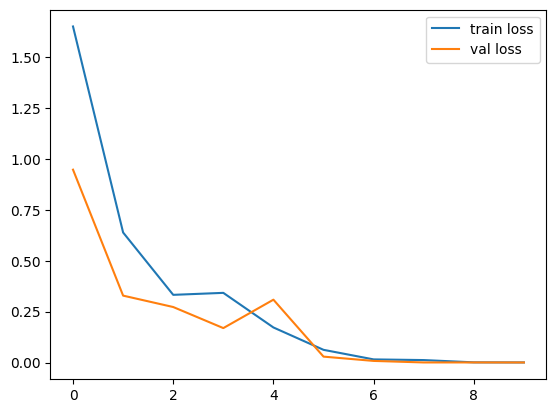

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

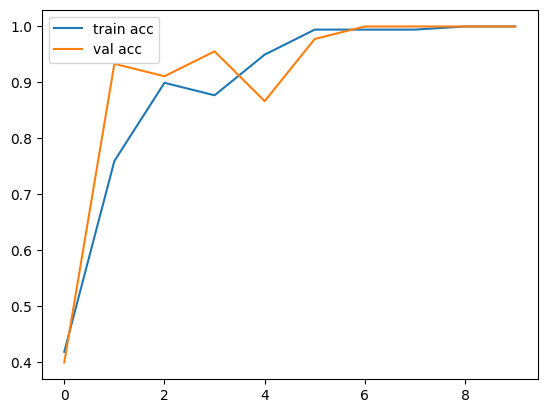

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#saving the model 
model.save('model.h5')

In [ ]:
'converting it to ONNx file '

'converting it to ONNx file '

In [ ]:
#!pip install tf2onnx


In [ ]:
import tf2onnx
import keras
import tensorflow as tf

# Load the Keras model
keras_model_path = 'model.h5'
keras_model = keras.models.load_model(keras_model_path)

# Convert the Keras model to ONNX
onnx_model_path = 'model.onnx'
tf2onnx.convert.from_keras(keras_model, output_path=onnx_model_path)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
##infrence using model.onnx

In [7]:
#!pip install onnxruntime


In [ ]:
import onnxruntime
import numpy as np

In [ ]:
onnx_model = 'model.onnx'
session = onnxruntime.InferenceSession(onnx_model_path)


In [ ]:
input_name = session.get_inputs()[0].name

In [ ]:
session.get_inputs()[0].shape

['unk__32', 150, 150, 3]

In [ ]:
import cv2

In [ ]:
img = cv2.imread('Iphone.jpeg') #size was 203,233 have to resize it to 150,150 as our model take that as input 
img = cv2.resize(img,(150,150))

In [ ]:
img = np.array(img)
img.shape

(150, 150, 3)

In [ ]:
img = img.astype(np.float32) / 255.0 #Normalizing and converting it to float


In [ ]:
img = np.expand_dims(img,axis=0) #expanding dim to add batch size 

In [ ]:
img.shape

(1, 150, 150, 3)

In [ ]:
#doing the infrence 
output = session.run(None, {input_name: img})


In [ ]:
np.argmax(output[0][0])

2

In [ ]:
train_dir.class_indices

{'headphone': 0, 'laptop': 1, 'phone': 2}

**Prediction
**

In [16]:
import onnxruntime
import numpy as np
import cv2 

class_dir = { 0: 'headphone', 1 : 'laptop', 2: 'phone'}

def prediction(file_path:str):
  # load the model 
  model = 'model.onnx'
  session = onnxruntime.InferenceSession(model)
  input_name = session.get_inputs()[0].name

  #read the image
  image = cv2.imread(file_path)
  #resize it 
  image = cv2.resize(image,(150,150)) #!50,150 coz our model was trained on this size input 
  #convert it into numpy array 
  image = np.array(image)
  #Noramlize it and change to float 
  image = image.astype(np.float32)/225.0
  #Expand the dimension to add batch size 
  image = np.expand_dims(image,axis=0)
  #make prdiction 
  output = session.run(None, {input_name: image})
  #get the class 
  class_ = np.argmax(output[0][0])
  return class_dir[class_]



In [17]:
prediction('Iphone.jpeg')

'phone'